# **Temperature Analysis Documentation**

# **Overview**

This project involves analyzing temperature data from NOAA (National Oceanic and Atmospheric Administration) to visualize historical temperature records and anomalies. The main tasks include:

*  Visualizing record high and low temperatures from 2005 to 2014.
*  Highlighting 2015 temperature records that exceeded historical highs or lows.

*  Addressing leap day (February 29th) considerations.
*  Consider issues such as legends, labels, and chart junk.
*  Mapping station locations near Ann Arbor, Michigan.

*  Summarizing 2015 temperature data for Ann Arbor, Michigan.




# **Dataset Description**
# **temperature.csv**
* id: Station identification code.
* date: Observation date (YYYY-MM-DD).
* element: Temperature type (TMAX/TMIN).
* value: Recorded temperature value (tenths of degrees Celsius).

# **BinSize.csv**


*   Contains metadata on station locations and other details.




# **Tools and Libraries Used**
*  Pandas: Data manipulation and analysis.
*  NumPy: Handling numerical operations.
*  Matplotlib: Data visualization.
*  Seaborn: Enhanced visualizations.
*  Geopandas: For mapping and geospatial analysis.
*  Folium: Interactive map visualization.





In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Data Loading and Preprocessing

Loaded the dataset and converted the Date column to a datetime format to facilitate time-series analysis. Extracted Year and DayOfYear to group data by day of the year.

In [65]:
temperature_df = pd.read_csv('/content/drive/MyDrive/temperature (1) (1) (1) (1) (1).csv')

In [66]:
# The first 4 instances of the dataframe
temperature_df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [67]:
# Printing the number of N/A values in eacg column
print(temperature_df.isna().sum())

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64


In [68]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
temperature_df.describe()

,Data_Value
count,165085.000000
mean,95.422116
std,123.515131
min,-343.000000
25%,0.000000
50%,94.000000
75%,189.000000
max,406.000000


In [69]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [70]:
# Checking the values in the Element column
temperature_df['Element'].value_counts()

,count
Element,
TMAX,83063
TMIN,82022


In [71]:
# Convert 'Date' column to datetime format
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])

In [72]:
# Extract the year and day of the year from the 'Date' column
temperature_df['Year'] = temperature_df['Date'].dt.year
temperature_df['DayOfYear'] = temperature_df['Date'].dt.dayofyear

Filtering Data (2005-2014)

Filtered the dataset to include only records from 2005 to 2014. This period was chosen to calculate record high and low temperatures for each day, serving as a benchmark for 2015 data comparison.

In [73]:
# Filter data for the period 2005-2014
filtered_df = temperature_df[(temperature_df['Year'] >= 2005) & (temperature_df['Year'] <= 2014)]

In [74]:
# Group data by 'DayOfYear' and get the record high and low temperatures
# Assuming 'Data_Value' holds the temperature values and 'Element' differentiates 'max' and 'min' temperatures
day_of_year_stats = filtered_df.groupby('DayOfYear')['Data_Value'].agg(['min', 'max'])

1. Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

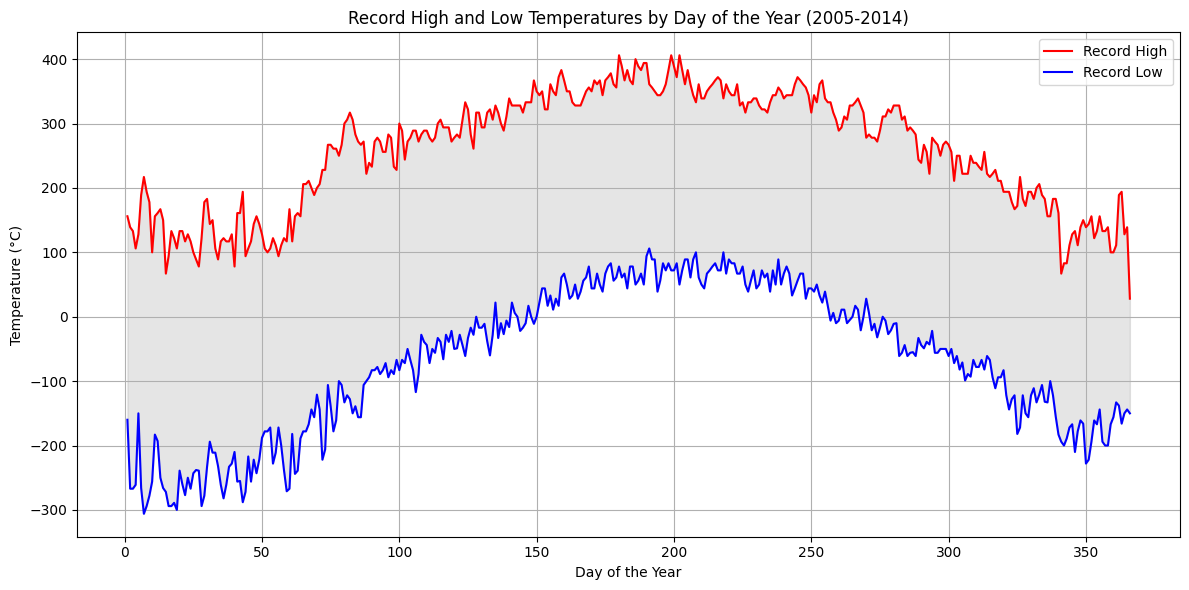

In [75]:
# Create the line plot
plt.figure(figsize=(12, 6))

# Plot the record high and record low temperatures
plt.plot(day_of_year_stats.index, day_of_year_stats['max'], color='red', label='Record High')
plt.plot(day_of_year_stats.index, day_of_year_stats['min'], color='blue', label='Record Low')

# Shade the area between the record high and low temperatures
plt.fill_between(day_of_year_stats.index, day_of_year_stats['min'], day_of_year_stats['max'], alpha=0.2, color='gray')

# Customize the plot
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.title('Record High and Low Temperatures by Day of the Year (2005-2014)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

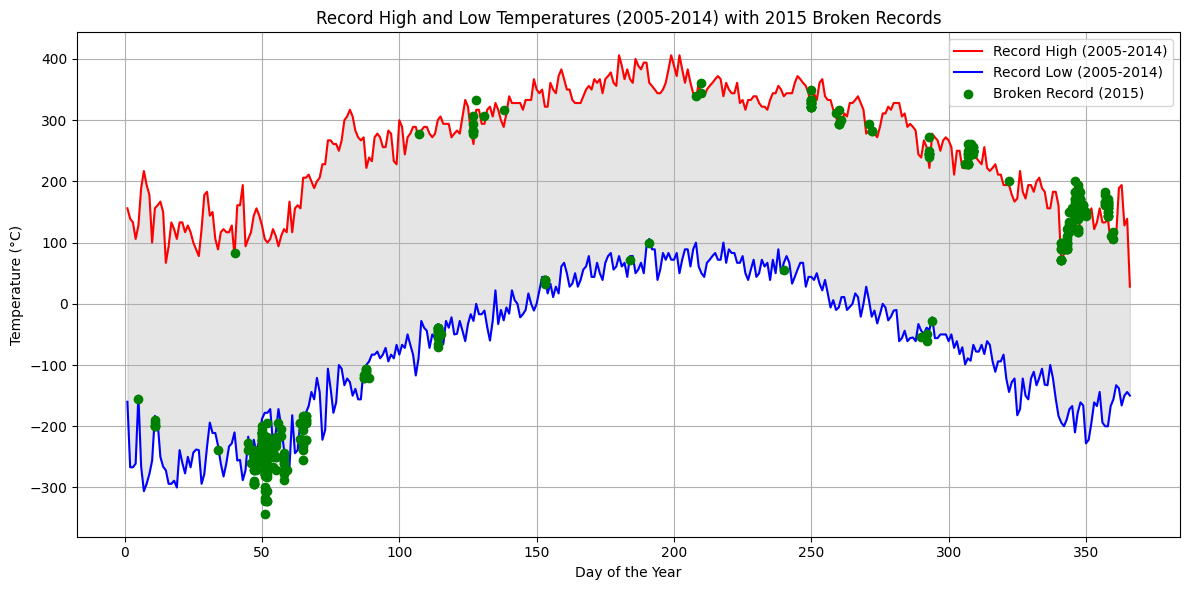

In [76]:
# Filter data for 2015
df_2015 = temperature_df[temperature_df['Year'] == 2015]

# Rename columns in day_of_year_stats for merging
day_of_year_stats_renamed = day_of_year_stats.rename(columns={'min': 'min_record', 'max': 'max_record'})

# Merge 2015 data with the day of year stats to compare against record highs/lows
merged_df = pd.merge(df_2015, day_of_year_stats_renamed, on='DayOfYear')

# Identify broken records in 2015
broken_records_df = merged_df[
    (merged_df['Data_Value'] > merged_df['max_record']) |
    (merged_df['Data_Value'] < merged_df['min_record'])
]

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot the record high and record low temperatures for 2005-2014
plt.plot(day_of_year_stats_renamed.index, day_of_year_stats_renamed['max_record'], color='red', label='Record High (2005-2014)')
plt.plot(day_of_year_stats_renamed.index, day_of_year_stats_renamed['min_record'], color='blue', label='Record Low (2005-2014)')

# Fill between the record high and low
plt.fill_between(day_of_year_stats_renamed.index,
                 day_of_year_stats_renamed['min_record'],
                 day_of_year_stats_renamed['max_record'],
                 color='gray', alpha=0.2)

# Scatter plot for broken records in 2015
plt.scatter(broken_records_df['DayOfYear'], broken_records_df['Data_Value'], color='green', label='Broken Record (2015)', zorder=3)

# Customize the plot
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Broken Records')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

In [77]:
# Filter out February 29th (leap days)
temperature_df = temperature_df[~((temperature_df['Date'].dt.month == 2) & (temperature_df['Date'].dt.day == 29))]

<ipython-input-78-94230e67b407>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_df['Month'] = temperature_df['Date'].dt.month
<ipython-input-78-94230e67b407>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_df['Day'] = temperature_df['Date'].dt.day


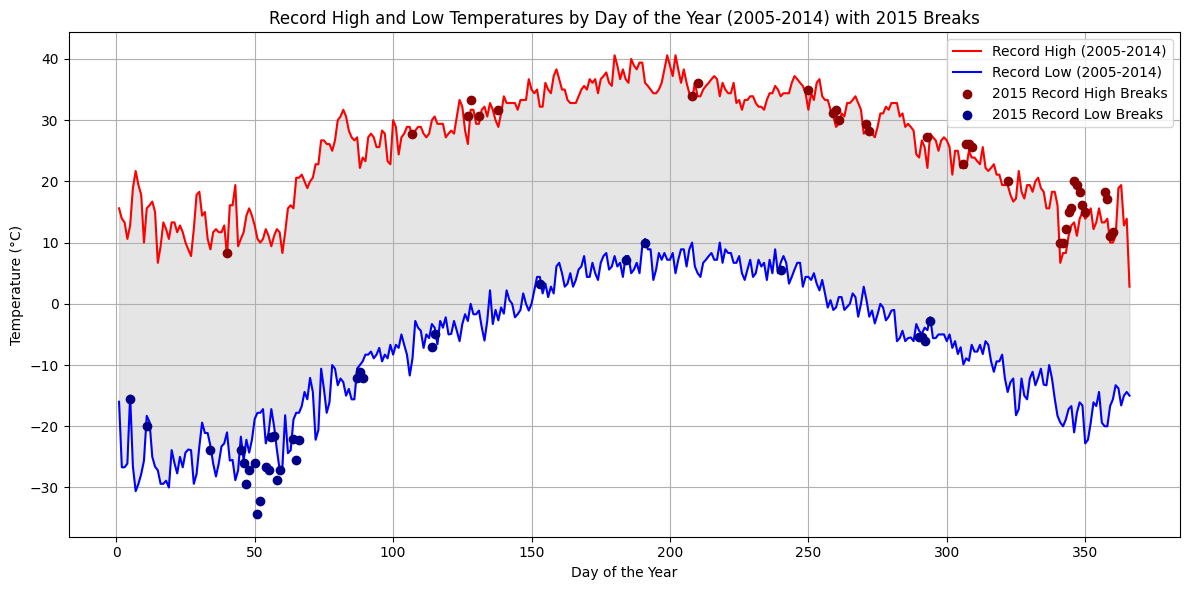

In [78]:
# Remove leap days (February 29th)
temperature_df['Month'] = temperature_df['Date'].dt.month
temperature_df['Day'] = temperature_df['Date'].dt.day

# Filter out February 29th (Leap day)
temperature_df_no_leap = temperature_df[~((temperature_df['Month'] == 2) & (temperature_df['Day'] == 29))]

# Extract year, month, and day from the 'Date' column
temperature_df_no_leap['Year'] = temperature_df_no_leap['Date'].dt.year
temperature_df_no_leap['DayOfYear'] = temperature_df_no_leap['Date'].dt.dayofyear

# Filter data for the period 2005-2014
filtered_df = temperature_df_no_leap[(temperature_df_no_leap['Year'] >= 2005) & (temperature_df_no_leap['Year'] <= 2014)]

# Group data by day of the year and get the record high and low temperatures
day_of_year_stats = filtered_df.groupby('DayOfYear')['Data_Value'].agg(['min', 'max'])

# Convert Data_Value to temperature in Celsius (if it is in tenths of a degree)
day_of_year_stats['max'] = day_of_year_stats['max'] / 10
day_of_year_stats['min'] = day_of_year_stats['min'] / 10

# Filter data for 2015
temperature_df_2015 = temperature_df_no_leap[temperature_df_no_leap['Year'] == 2015]

# Extract high and low temperatures for 2015
temperature_2015 = temperature_df_2015.groupby('DayOfYear')['Data_Value'].agg(['min', 'max'])

# Convert 2015 data to Celsius
temperature_2015['max'] = temperature_2015['max'] / 10
temperature_2015['min'] = temperature_2015['min'] / 10

# Align the indices of 2015 data with the 2005-2014 records
temperature_2015_aligned = temperature_2015.reindex(day_of_year_stats.index)

# Find points where the 2015 data exceeds the 2005-2014 record high or breaks the record low
high_breaks = temperature_2015_aligned[temperature_2015_aligned['max'] > day_of_year_stats['max']]
low_breaks = temperature_2015_aligned[temperature_2015_aligned['min'] < day_of_year_stats['min']]

# Create the line plot without leap days
plt.figure(figsize=(12, 6))
plt.plot(day_of_year_stats.index, day_of_year_stats['max'], color='red', label='Record High (2005-2014)')
plt.plot(day_of_year_stats.index, day_of_year_stats['min'], color='blue', label='Record Low (2005-2014)')
plt.fill_between(day_of_year_stats.index, day_of_year_stats['min'], day_of_year_stats['max'], alpha=0.2, color='gray')

# Overlay scatter of 2015 data where record high or low was broken
plt.scatter(high_breaks.index, high_breaks['max'], color='darkred', zorder=5, label='2015 Record High Breaks')
plt.scatter(low_breaks.index, low_breaks['min'], color='darkblue', zorder=5, label='2015 Record Low Breaks')

# Customize the plot
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (°C)')
plt.title('Record High and Low Temperatures by Day of the Year (2005-2014) with 2015 Breaks')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

4. Consider issues such as legends, labels, and chart junk.


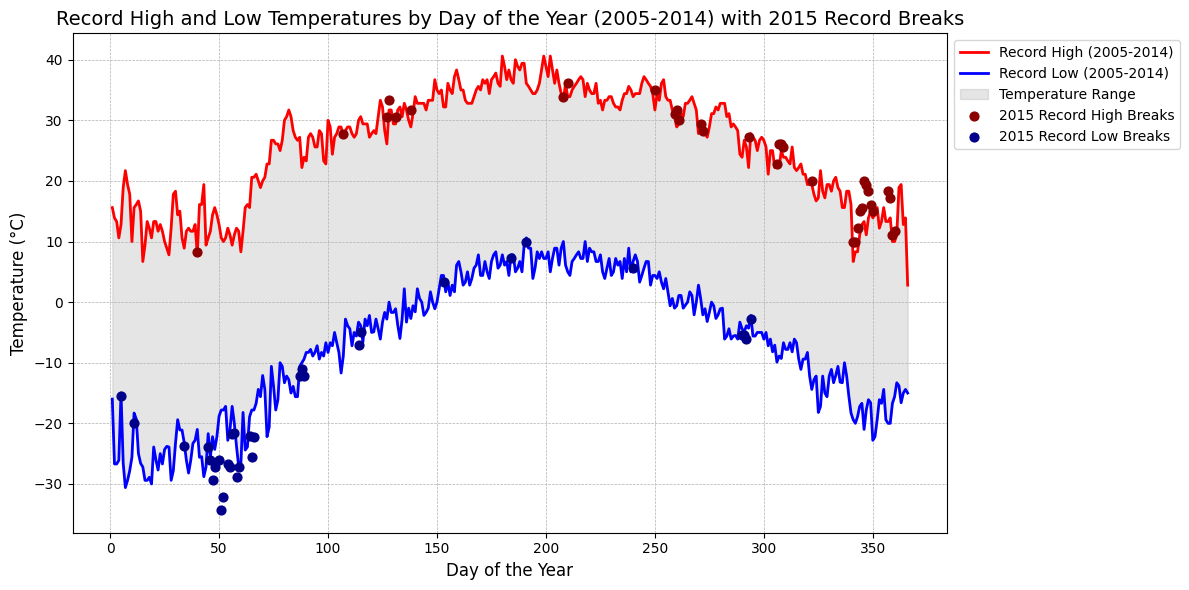

In [79]:
# Remove leap days (February 29th)
temperature_df = temperature_df[~((temperature_df['Date'].dt.month == 2) & (temperature_df['Date'].dt.day == 29))]

# Extract year, month, and day from the 'Date' column
temperature_df['Year'] = temperature_df['Date'].dt.year
temperature_df['Month'] = temperature_df['Date'].dt.month
temperature_df['Day'] = temperature_df['Date'].dt.day
temperature_df['DayOfYear'] = temperature_df['Date'].dt.dayofyear

# Filter data for the period 2005-2014
filtered_df = temperature_df[(temperature_df['Year'] >= 2005) & (temperature_df['Year'] <= 2014)]

# Group data by day of the year and get the record high and low temperatures
day_of_year_stats = filtered_df.groupby('DayOfYear')['Data_Value'].agg(['min', 'max'])

# Convert temperatures to Celsius (if in tenths of a degree)
day_of_year_stats['max'] = day_of_year_stats['max'] / 10
day_of_year_stats['min'] = day_of_year_stats['min'] / 10

# Filter data for 2015
temperature_df_2015 = temperature_df[temperature_df['Year'] == 2015]

# Extract high and low temperatures for 2015
temperature_2015 = temperature_df_2015.groupby('DayOfYear')['Data_Value'].agg(['min', 'max'])

# Convert 2015 data to Celsius
temperature_2015['max'] = temperature_2015['max'] / 10
temperature_2015['min'] = temperature_2015['min'] / 10

# Align the indices of 2015 data with the 2005-2014 records
temperature_2015_aligned = temperature_2015.reindex(day_of_year_stats.index)

# Find points where the 2015 data exceeds the 2005-2014 record high or breaks the record low
high_breaks = temperature_2015_aligned[temperature_2015_aligned['max'] > day_of_year_stats['max']]
low_breaks = temperature_2015_aligned[temperature_2015_aligned['min'] < day_of_year_stats['min']]

# Create the line plot without leap days
plt.figure(figsize=(12, 6))

# Plot record high and low temperatures with improved labels
plt.plot(day_of_year_stats.index, day_of_year_stats['max'], color='red', label='Record High (2005-2014)', linewidth=2)
plt.plot(day_of_year_stats.index, day_of_year_stats['min'], color='blue', label='Record Low (2005-2014)', linewidth=2)

# Fill the area between the record high and low temperatures
plt.fill_between(day_of_year_stats.index, day_of_year_stats['min'], day_of_year_stats['max'], alpha=0.2, color='gray', label='Temperature Range')

# Overlay scatter of 2015 data where record high or low was broken
plt.scatter(high_breaks.index, high_breaks['max'], color='darkred', zorder=5, label='2015 Record High Breaks', s=40)
plt.scatter(low_breaks.index, low_breaks['min'], color='darkblue', zorder=5, label='2015 Record Low Breaks', s=40)

# Customize the plot with clear labels and title
plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Record High and Low Temperatures by Day of the Year (2005-2014) with 2015 Record Breaks', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Position the legend outside the chart

# Add grid lines but reduce visual clutter
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove any unnecessary chart elements (chart junk)
plt.tight_layout()  # Ensures everything fits nicely
plt.show()

In [80]:
bin_size_data = pd.read_csv('/content/drive/MyDrive/BinSize (1) (1) (1) (1) (1).csv')

In [81]:
# The first 4 instances of the dataframe
bin_size_data.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


ID               0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
STATE         5452
NAME             0
GSNFLAG      17332
HCNFLAG      16877
WMOID        12088
x                0
y                0
x_group          1
y_group          0
xy_group         0
hash             0
dtype: int64


<Axes: >

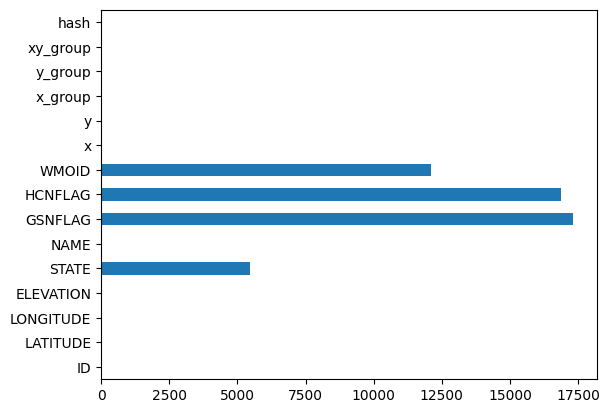

In [82]:
# Printing the number of N/A values in eacg column
print(bin_size_data.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
bin_size_data.isna().sum().plot.barh()

In [83]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
bin_size_data.describe()

,LATITUDE,LONGITUDE,ELEVATION,WMOID,x,y
count,18259.000000,18259.000000,18259.000000,6171.000000,1.825900e+04,1.825900e+04
mean,36.862167,-54.090018,582.410685,58389.632799,-4.328554e+06,4.098892e+06
std,22.016258,81.612630,713.235554,26847.030026,6.932991e+06,2.448100e+06
min,-90.000000,-179.983000,-999.900000,1001.000000,-1.922509e+07,-1.000756e+07
25%,34.411800,-110.100000,88.000000,34318.000000,-8.820602e+06,3.826423e+06
50%,41.109200,-88.190600,281.000000,67315.000000,-7.363517e+06,4.571141e+06
75%,47.531100,5.226550,806.100000,74504.000000,3.517924e+05,5.285225e+06
max,82.516700,179.320000,4701.000000,98851.000000,1.970828e+07,9.175451e+06


In [84]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
bin_size_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  y          18259 non-null  float64
 11  x_group    18258 non-null  object 
 12  y_group    18259 non-null  object 
 13  xy_group   18259 non-null  object 
 14  hash       18259 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.1+ MB


In [85]:
# Checking the values in the name column
bin_size_data['NAME'].value_counts()

,count
NAME,
NEWPORT,7
FAIRFIELD,7
JACKSON,7
HILLSBORO,6
CARTHAGE,6
...,...
VJAZMA,1
KALININGRAD,1
SMOLENSK,1


5. The data you have been given is near **Ann Arbor, Michigan, United States**, and visualize on map the stations the data.

In [86]:
# Task 5: Map Visualization (Stations near Ann Arbor)
ann_arbor_stations = bin_size_data[
    (bin_size_data['LATITUDE'] >= 42 - 2) &
    (bin_size_data['LATITUDE'] <= 42 + 2) &
    (bin_size_data['LONGITUDE'] >= -84 - 2) &
    (bin_size_data['LONGITUDE'] <= -84 + 2)
]

In [87]:
# Initialize a folium map centered at Ann Arbor
map_ann_arbor = folium.Map(location=[42.2808, -83.7430], zoom_start=10)

# Add markers for each station
for _, station in ann_arbor_stations.iterrows():
    folium.Marker(
        [station['LATITUDE'], station['LONGITUDE']],
        popup=f"Station: {station['NAME']}, ID: {station['ID']}"
    ).add_to(map_ann_arbor)

# Display the map (use this in Jupyter or save to HTML)
map_ann_arbor.save("Ann_Arbor_Stations_Map.html")  # For external view
map_ann_arbor  # Jupyter auto-render

6. Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

In [88]:

# Filter temperature data for 2015 and for stations near Ann Arbor
temperature_2015 = temperature_df[
    (temperature_df['Year'] == 2015) &
    (temperature_df['ID'].isin(ann_arbor_stations['ID']))
]

In [89]:
# Pivot to separate TMAX and TMIN for plotting
temperature_2015_pivot = temperature_2015.pivot_table(
    index='Date',
    columns='Element',
    values='Data_Value'
)

In [90]:
# Convert temperature from tenths of °C to °C
temperature_2015_pivot['TMAX'] = temperature_2015_pivot['TMAX'] / 10
temperature_2015_pivot['TMIN'] = temperature_2015_pivot['TMIN'] / 10

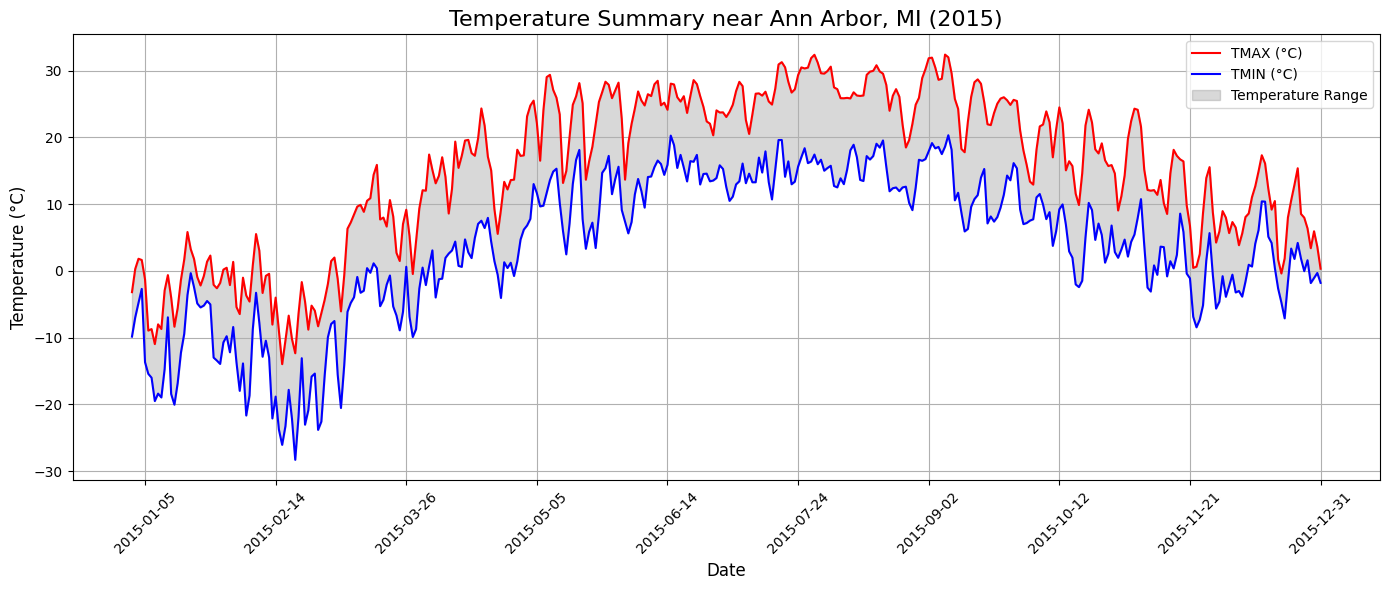

In [91]:
# Remove rows with missing TMAX or TMIN data for cleaner plotting
temperature_2015_pivot = temperature_2015_pivot.dropna(subset=['TMAX', 'TMIN'])

# Plot Temperature Summary
plt.figure(figsize=(14, 6))
plt.plot(temperature_2015_pivot.index, temperature_2015_pivot['TMAX'], label='TMAX (°C)', color='red', linewidth=1.5)
plt.plot(temperature_2015_pivot.index, temperature_2015_pivot['TMIN'], label='TMIN (°C)', color='blue', linewidth=1.5)

plt.fill_between(
    temperature_2015_pivot.index,
    temperature_2015_pivot['TMIN'],
    temperature_2015_pivot['TMAX'],
    color='gray', alpha=0.3, label='Temperature Range'
)

plt.title('Temperature Summary near Ann Arbor, MI (2015)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))  # Monthly ticks for better readability
plt.tight_layout()

plt.show()

# **Conclusion**
This analysis provides insights into historical temperature records and anomalies in 2015, offering a comprehensive look into temperature trends near Ann Arbor.